In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [164]:
data = pd.read_csv('红酒质量-已清洗.csv')

In [166]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [168]:
X = data.drop('quality', axis=1)  
Y = data['quality']  

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [172]:
svc = SVC(probability=True)  
svc.fit(X_train, Y_train)

SVC(probability=True)

In [174]:
X_train_prediction = svc.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)
f1_train =f1_score(X_train_prediction,Y_train,average='weighted')
print(train_data_accuracy)
print(f1_train)

0.5128617363344051
0.5670903659894885


In [176]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
f1_test =f1_score(X_test_prediction,Y_test,average='weighted')
print(test_data_accuracy)
print(f1_test)

0.4919614147909968
0.5503136535245587


In [178]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题plt.figure(figsize=(10, 7))

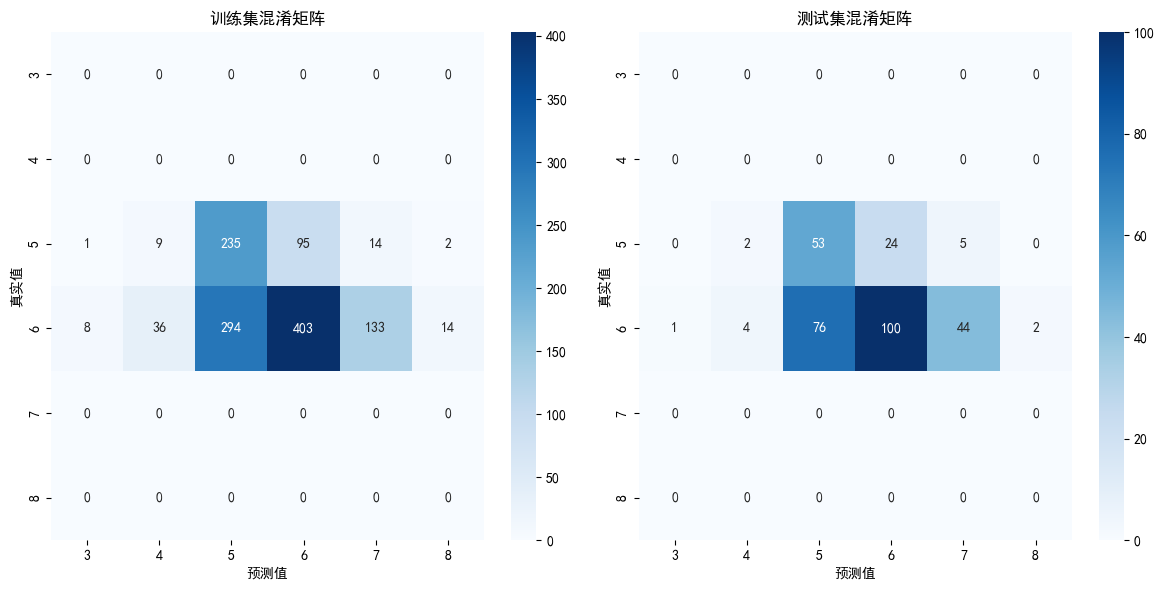

In [180]:
conf_matrix = confusion_matrix(X_train_prediction,Y_train)
conf_matrix_test = confusion_matrix(X_test_prediction,Y_test)

# 设置图形大小
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

# 绘制训练集的混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[0])  # 使用ax[0]指定在哪个子图上绘制
ax[0].set_ylabel('真实值')
ax[0].set_xlabel('预测值')
ax[0].set_title('训练集混淆矩阵')

# 绘制测试集的混淆矩阵
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[1])  # 使用ax[1]指定在哪个子图上绘制
ax[1].set_ylabel('真实值')
ax[1].set_xlabel('预测值')
ax[1].set_title('测试集混淆矩阵')

# 自动调整布局
plt.tight_layout()
plt.savefig("svc-数据清洗.png", dpi=300, bbox_inches='tight') 
# 显示图形
plt.show()

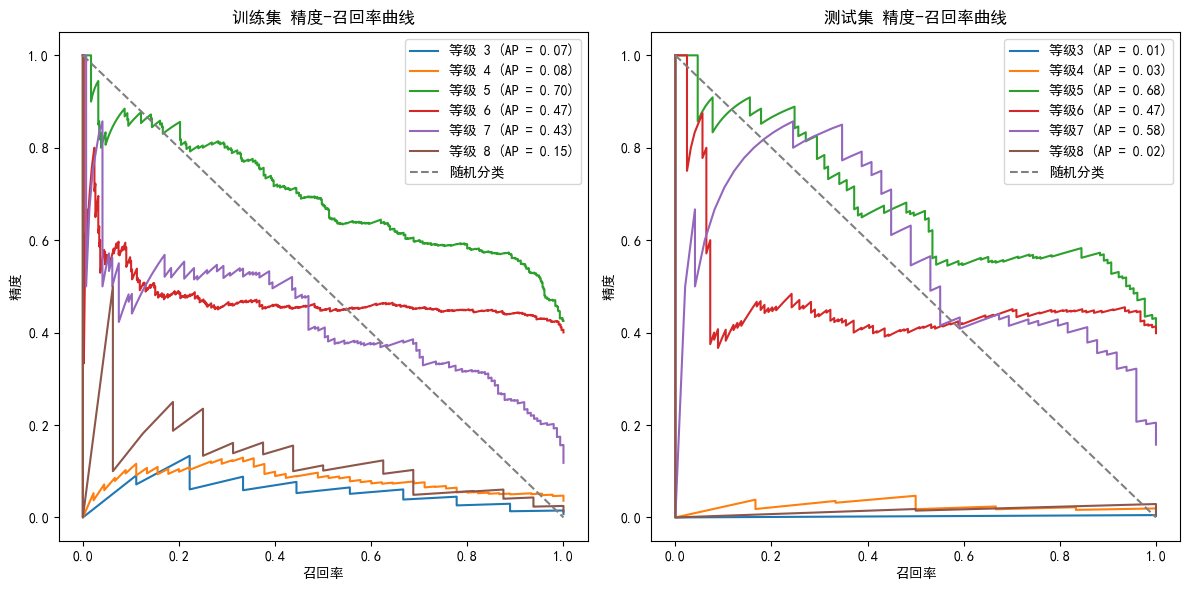

In [184]:
Y_train_probs = svc.predict_proba(X_train)
unique_classes_train = np.unique(Y_train)

# 获取测试集的预测概率
Y_test_probs = svc.predict_proba(X_test)
unique_classes_test = np.unique(Y_test)

# 设置图形大小和子图的排列 (1 行 2 列)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练集的精度-召回率曲线
for i in unique_classes_train:
    precision, recall, _ = precision_recall_curve(Y_train == i, Y_train_probs[:, i-3])
    ax[0].plot(recall, precision, label=f'等级 {i} (AP = {average_precision_score(Y_train == i, Y_train_probs[:, i-3]):.2f})')

# 绘制测试集的精度-召回率曲线
for i in unique_classes_test:
    precision, recall, _ = precision_recall_curve(Y_test == i, Y_test_probs[:, i-3])
    ax[1].plot(recall, precision, label=f'等级{i} (AP = {average_precision_score(Y_test == i, Y_test_probs[:, i-3]):.2f})')

# 在两个子图中分别绘制随机分类器的对角线
ax[0].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')
ax[1].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')

# 设置标题、标签和图例
ax[0].set_title('训练集 精度-召回率曲线')
ax[0].set_xlabel('召回率')
ax[0].set_ylabel('精度')
ax[0].legend(loc='best')

ax[1].set_title('测试集 精度-召回率曲线')
ax[1].set_xlabel('召回率')
ax[1].set_ylabel('精度')
ax[1].legend(loc='best')
plt.savefig("svr-清洗数据-精度召回率-默认.png", dpi=300, bbox_inches='tight') 
# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [140]:
df = pd.read_csv('红酒质量-已清洗.csv')

In [142]:
X = df.drop('quality', axis=1).values
Y = df['quality'].values

In [144]:
Y = Y - 3

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [148]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6个类别（3-8）

In [150]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [152]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 3.3148 - accuracy: 0.3075 - val_loss: 1.4377 - val_accuracy: 0.3815
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4744 - val_loss: 1.2913 - val_accuracy: 0.4779
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1821 - accuracy: 0.4754 - val_loss: 1.2412 - val_accuracy: 0.5181
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1775 - accuracy: 0.4774 - val_loss: 1.2387 - val_accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1363 - accuracy: 0.4925 - val_loss: 1.2328 - val_accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1308 - accuracy: 0.4864 - val_loss: 1.2244 - val_accuracy: 0.5221
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1620 - accuracy: 0.4824 - val_loss: 1.2589 - val_accuracy: 0.4498
Epoch 8/100
3

In [153]:
Y_train_pred = model.predict(X_train)
Y_train_pred_max = np.argmax(Y_train_pred, axis=1)
accuracy = accuracy_score(Y_train_pred_max, Y_train)
print(f"Accuracy: {accuracy:.4f}")
f1_train= f1_score(Y_train_pred_max, Y_train, average='weighted')
print(f1_train)

39/39 [==============================] - 0s 579us/step
Accuracy: 0.5675
0.6106756239770065


In [154]:
Y_test_pred = model.predict(X_test)
Y_test_pred_max = np.argmax(Y_test_pred, axis=1)
accuracy = accuracy_score(Y_test_pred_max, Y_test)
print(f"Accuracy: {accuracy:.4f}")
f1_test= f1_score(Y_test_pred_max, Y_test, average='weighted')
print(f1_test)

10/10 [==============================] - 0s 778us/step
Accuracy: 0.5016
0.5406835063695457


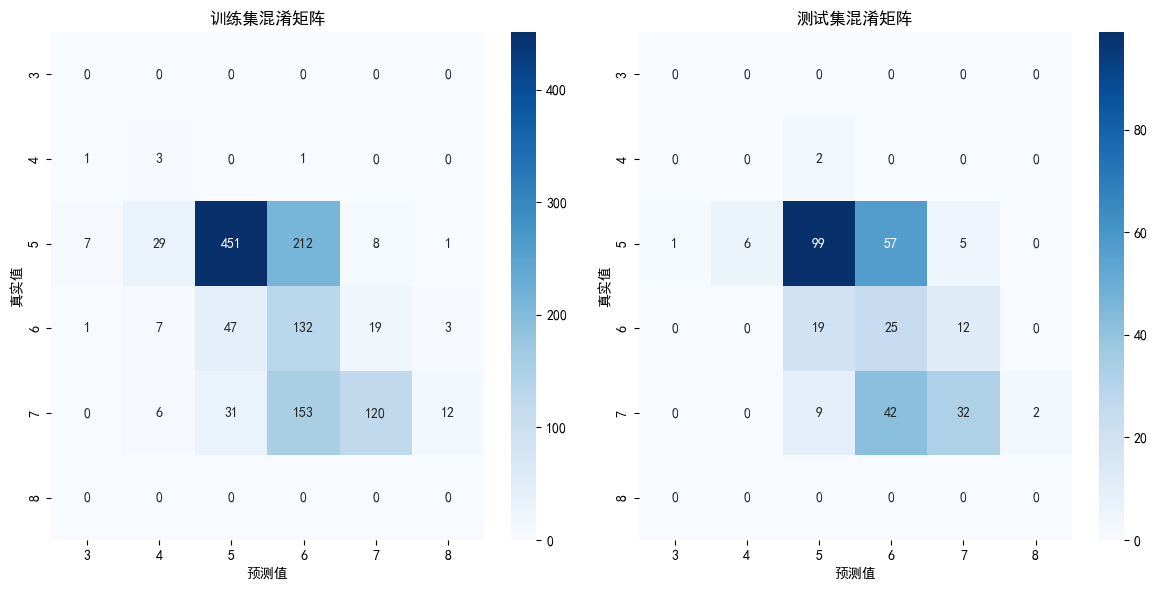

In [158]:
conf_matrix = confusion_matrix(Y_train_pred_max, Y_train)
conf_matrix_test = confusion_matrix(Y_test_pred_max, Y_test)

# 设置图形大小
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

# 绘制训练集的混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[0])  # 使用ax[0]指定在哪个子图上绘制
ax[0].set_ylabel('真实值')
ax[0].set_xlabel('预测值')
ax[0].set_title('训练集混淆矩阵')

# 绘制测试集的混淆矩阵
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[1])  # 使用ax[1]指定在哪个子图上绘制
ax[1].set_ylabel('真实值')
ax[1].set_xlabel('预测值')
ax[1].set_title('测试集混淆矩阵')

# 自动调整布局
plt.tight_layout()
plt.savefig("NN-数据清洗.png", dpi=300, bbox_inches='tight') 
# 显示图形
plt.show()

10/10 [==============================] - 0s 778us/step


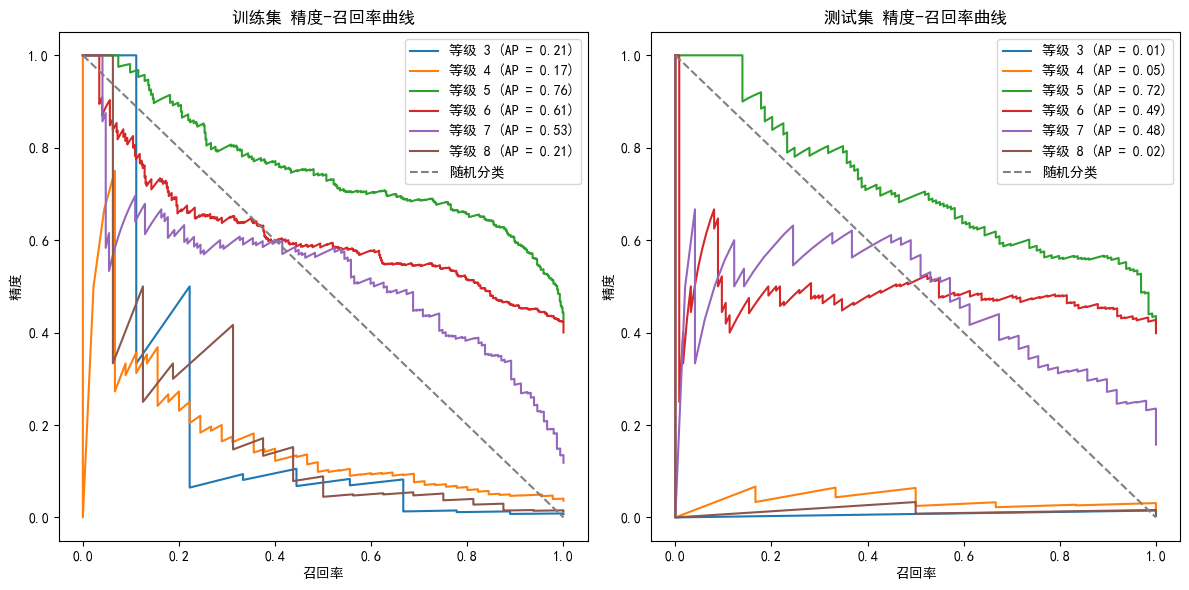

In [160]:
Y_train_probs = model.predict(X_train)
Y_test_probs = model.predict(X_test)

# 获取唯一类别标签
unique_classes_train = np.unique(Y_train)
unique_classes_test = np.unique(Y_test)

# 设置图形大小和子图的排列 (1 行 2 列)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练集的精度-召回率曲线
for i in unique_classes_train:
    precision, recall, _ = precision_recall_curve(Y_train == i, Y_train_probs[:, i])
    average_precision = average_precision_score(Y_train == i, Y_train_probs[:, i])
    ax[0].plot(recall, precision, label=f'等级 {i+3} (AP = {average_precision:.2f})')

# 绘制测试集的精度-召回率曲线
for i in unique_classes_test:
    precision, recall, _ = precision_recall_curve(Y_test == i, Y_test_probs[:, i])
    average_precision = average_precision_score(Y_test == i, Y_test_probs[:, i])
    ax[1].plot(recall, precision, label=f'等级 {i+3} (AP = {average_precision:.2f})')

# 在两个子图中分别绘制随机分类器的对角线
ax[0].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')
ax[1].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')

# 设置标题、标签和图例
ax[0].set_title('训练集 精度-召回率曲线')
ax[0].set_xlabel('召回率')
ax[0].set_ylabel('精度')
ax[0].legend(loc='best')

ax[1].set_title('测试集 精度-召回率曲线')
ax[1].set_xlabel('召回率')
ax[1].set_ylabel('精度')
ax[1].legend(loc='best')

# 保存并显示图形
plt.tight_layout()
plt.savefig("nn-清洗数据-精度召回率-默认.png", dpi=300, bbox_inches='tight') 
plt.show()